<a href="https://colab.research.google.com/github/kokeitor/COMPAS_BIAS/blob/main/compas_bias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install  pandas numpy matplotlib seaborn scikit-learn

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [105]:
data = pd.read_csv('/content/drive/MyDrive/MásterIA/etica/data/cox-violent-parsed.csv')

In [106]:
data.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event
0,1.0,miguel hernandez,miguel,hernandez,14/08/2013,Male,18/04/1947,69,Greater than 45,Other,...,Risk of Violence,1,Low,14/08/2013,07/07/2014,14/07/2014,0,0,327,0
1,2.0,miguel hernandez,miguel,hernandez,14/08/2013,Male,18/04/1947,69,Greater than 45,Other,...,Risk of Violence,1,Low,14/08/2013,07/07/2014,14/07/2014,0,334,961,0
2,3.0,michael ryan,michael,ryan,31/12/2014,Male,06/02/1985,31,25 - 45,Caucasian,...,Risk of Violence,2,Low,31/12/2014,30/12/2014,03/01/2015,0,3,457,0
3,4.0,kevon dixon,kevon,dixon,27/01/2013,Male,22/01/1982,34,25 - 45,African-American,...,Risk of Violence,1,Low,27/01/2013,26/01/2013,05/02/2013,0,9,159,1
4,5.0,ed philo,ed,philo,14/04/2013,Male,14/05/1991,24,Less than 25,African-American,...,Risk of Violence,3,Low,14/04/2013,16/06/2013,16/06/2013,4,0,63,0


In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18316 entries, 0 to 18315
Data columns (total 52 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       11001 non-null  float64
 1   name                     18316 non-null  object 
 2   first                    18316 non-null  object 
 3   last                     18316 non-null  object 
 4   compas_screening_date    18316 non-null  object 
 5   sex                      18316 non-null  object 
 6   dob                      18316 non-null  object 
 7   age                      18316 non-null  int64  
 8   age_cat                  18316 non-null  object 
 9   race                     18316 non-null  object 
 10  juv_fel_count            18316 non-null  int64  
 11  decile_score             18316 non-null  int64  
 12  juv_misd_count           18316 non-null  int64  
 13  juv_other_count          18316 non-null  int64  
 14  priors_count          

In [108]:
data.describe()

,id,age,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_days_from_compas,is_recid,r_days_from_arrest,violent_recid,is_violent_recid,decile_score.1,v_decile_score,priors_count.1,start,end,event
count,11001.00000,18316.000000,18316.000000,18316.000000,18316.000000,18316.000000,18316.000000,17019.000000,17449.000000,18316.000000,6359.000000,0.0,18316.000000,18316.000000,18316.000000,18316.000000,18316.000000,18316.000000,18316.000000
mean,5501.00000,34.019273,0.076873,4.997052,0.098439,0.124263,3.913191,4.302485,57.694596,0.414774,19.961629,NaN,0.073105,4.997052,4.022822,3.913191,186.394901,625.210636,0.044715
std,3175.85949,11.667811,0.464272,2.937569,0.517639,0.524537,5.299864,81.159881,317.994694,0.576449,74.139695,NaN,0.260317,2.937569,2.614189,5.299864,283.373004,335.881439,0.206683
min,1.00000,18.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-597.000000,0.000000,-1.000000,-1.000000,NaN,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,2751.00000,25.000000,0.000000,2.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,0.000000,0.000000,NaN,0.000000,2.000000,2.000000,0.000000,0.000000,364.000000,0.000000
50%,5501.00000,31.000000,0.000000,5.000000,0.000000,0.000000,2.000000,-1.000000,1.000000,0.000000,0.000000,NaN,0.000000,5.000000,4.000000,2.000000,7.000000,634.000000,0.000000
75%,8251.00000,41.000000,0.000000,8.000000,0.000000,0.000000,5.000000,0.000000,2.000000,1.000000,1.000000,NaN,0.000000,8.000000,6.000000,5.000000,309.000000,897.000000,0.000000
max,11001.00000,96.000000,20.000000,10.000000,13.000000,17.000000,43.000000,1057.000000,9485.000000,1.000000,993.000000,NaN,1.000000,10.000000,10.000000,43.000000,1197.000000,1187.000000,1.000000


In [109]:
data.isnull().sum()

id                          7315
name                           0
first                          0
last                           0
compas_screening_date          0
sex                            0
dob                            0
age                            0
age_cat                        0
race                           0
juv_fel_count                  0
decile_score                   0
juv_misd_count                 0
juv_other_count                0
priors_count                   0
days_b_screening_arrest     1297
c_jail_in                   1297
c_jail_out                  1297
c_case_number                867
c_offense_date              3952
c_arrest_date              15231
c_days_from_compas           867
c_charge_degree              867
c_charge_desc                881
is_recid                       0
r_case_number               9899
r_charge_degree             9899
r_days_from_arrest         11957
r_offense_date              9899
r_charge_desc              10039
r_jail_in 

In [110]:
# Proportion of ground truth recid samples :
data["is_recid"].value_counts()

is_recid
 0    9079
 1    8417
-1     820
Name: count, dtype: int64

In [111]:
# Proportion of compas score samples :
data["decile_score"].value_counts()

decile_score
 1     2923
 2     2031
 4     1830
 3     1813
 7     1720
 6     1713
 9     1670
 5     1649
 8     1614
 10    1330
-1       23
Name: count, dtype: int64

In [112]:
# Drop of -1 values
data = data[data["decile_score"] != -1]

In [113]:
# Proportion of compas score samples [no -1]
data["decile_score"].value_counts()

decile_score
1     2923
2     2031
4     1830
3     1813
7     1720
6     1713
9     1670
5     1649
8     1614
10    1330
Name: count, dtype: int64

In [114]:
# Not needed variables
columns_to_drop = ['id', 'first', 'last', 'in_custody', 'vr_charge_desc', 'r_case_number', 'vr_charge_degree',
                   'c_offense_date', 'c_case_number', 'r_offense_date', 'juv_other_count', 'end', 'event',
                   'screening_date', 'start', 'juv_misd_count', 'juv_fel_count', 'r_days_from_arrest',
                   'r_charge_degree', 'days_b_screening_arrest', 'vr_case_number', 'priors_count.1', 'r_jail_out',
                   'c_arrest_date', 'r_charge_desc', 'r_jail_in', 'violent_recid', 'decile_score.1',
                   'vr_offense_date', 'out_custody']

data.drop(columns=columns_to_drop, axis=1, inplace=True, errors='ignore')

In [115]:
data.columns

Index(['name', 'compas_screening_date', 'sex', 'dob', 'age', 'age_cat', 'race',
       'decile_score', 'priors_count', 'c_jail_in', 'c_jail_out',
       'c_days_from_compas', 'c_charge_degree', 'c_charge_desc', 'is_recid',
       'is_violent_recid', 'type_of_assessment', 'score_text',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date'],
      dtype='object')

In [116]:
# Date format

data['c_jail_in'] = pd.to_datetime(data['c_jail_in'])
data['c_jail_out'] = pd.to_datetime(data['c_jail_out'])
data['compas_screening_date'] = pd.to_datetime(data['compas_screening_date'])
data['v_screening_date'] = pd.to_datetime(data['v_screening_date'])
data['days_in_jail'] = abs((data['c_jail_out'] - data['c_jail_in']).dt.days)

<ipython-input-116-59e902b9847f>:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['c_jail_in'] = pd.to_datetime(data['c_jail_in'])
<ipython-input-116-59e902b9847f>:4: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['c_jail_out'] = pd.to_datetime(data['c_jail_out'])
<ipython-input-116-59e902b9847f>:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['compas_screening_date'] = pd.to_datetime(data['compas_screening_date'])
<ipython-input-116-59e902b9847f>:6: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data

In [117]:
# Checking change of date types
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18293 entries, 0 to 18315
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   18293 non-null  object        
 1   compas_screening_date  18293 non-null  datetime64[ns]
 2   sex                    18293 non-null  object        
 3   dob                    18293 non-null  object        
 4   age                    18293 non-null  int64         
 5   age_cat                18293 non-null  object        
 6   race                   18293 non-null  object        
 7   decile_score           18293 non-null  int64         
 8   priors_count           18293 non-null  int64         
 9   c_jail_in              17004 non-null  datetime64[ns]
 10  c_jail_out             17004 non-null  datetime64[ns]
 11  c_days_from_compas     17432 non-null  float64       
 12  c_charge_degree        17432 non-null  object        
 13  c_char

In [118]:
# Null values of dropped data
print("The sum of Null values in each columns ")
data.isnull().sum()

The sum of Null values in each columns 


name                        0
compas_screening_date       0
sex                         0
dob                         0
age                         0
age_cat                     0
race                        0
decile_score                0
priors_count                0
c_jail_in                1289
c_jail_out               1289
c_days_from_compas        861
c_charge_degree           861
c_charge_desc             875
is_recid                    0
is_violent_recid            0
type_of_assessment          0
score_text                  0
v_type_of_assessment        0
v_decile_score              0
v_score_text                0
v_screening_date            0
days_in_jail             1289
dtype: int64

In [119]:
# Imputing null values techniques :
# Median
numeric_cols = ['c_days_from_compas', 'v_decile_score',]
for col in numeric_cols:
    data[col].fillna(data[col].median(), inplace=True)

# Impute missing values for categorical variables with the mode
categorical_cols = ['c_charge_degree', 'score_text', 'v_score_text', 'c_jail_in', 'c_jail_out', 'c_charge_desc', 'days_in_jail']
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Checking for any missing values remaining
print(data.isnull().sum())

name                     0
compas_screening_date    0
sex                      0
dob                      0
age                      0
age_cat                  0
race                     0
decile_score             0
priors_count             0
c_jail_in                0
c_jail_out               0
c_days_from_compas       0
c_charge_degree          0
c_charge_desc            0
is_recid                 0
is_violent_recid         0
type_of_assessment       0
score_text               0
v_type_of_assessment     0
v_decile_score           0
v_score_text             0
v_screening_date         0
days_in_jail             0
dtype: int64


In [120]:
# Statistics of new data
data.describe()

,compas_screening_date,age,decile_score,priors_count,c_jail_in,c_jail_out,c_days_from_compas,is_recid,is_violent_recid,v_decile_score,v_screening_date,days_in_jail
count,18293,18293.000000,18293.000000,18293.000000,18293,18293,18293.000000,18293.000000,18293.000000,18293.000000,18293,18293.000000
mean,2013-11-23 01:43:12.007871744,34.010605,5.004592,3.916689,2013-11-06 23:32:16.225878784,2013-12-06 16:26:17.885529856,54.948232,0.415241,0.073197,4.023780,2013-11-23 01:43:12.007871744,23.306839
min,2013-01-01 00:00:00,18.000000,1.000000,0.000000,2013-01-01 01:31:00,2013-01-02 01:12:00,0.000000,-1.000000,0.000000,1.000000,2013-01-01 00:00:00,0.000000
25%,2013-04-22 00:00:00,25.000000,2.000000,0.000000,2013-03-30 03:21:00,2013-04-30 07:29:00,1.000000,0.000000,0.000000,2.000000,2013-04-22 00:00:00,0.000000
50%,2013-11-09 00:00:00,31.000000,5.000000,2.000000,2013-10-18 09:30:00,2013-11-13 01:01:00,1.000000,0.000000,0.000000,4.000000,2013-11-09 00:00:00,1.000000
75%,2014-05-29 00:00:00,41.000000,8.000000,5.000000,2014-05-15 10:48:00,2014-06-10 07:56:00,2.000000,1.000000,0.000000,6.000000,2014-05-29 00:00:00,14.000000
max,2014-12-31 00:00:00,96.000000,10.000000,43.000000,2016-03-11 10:26:00,2020-01-01 00:00:00,9485.000000,1.000000,1.000000,10.000000,2014-12-31 00:00:00,2152.000000
std,NaN,11.661140,2.931703,5.302139,NaN,NaN,310.686935,0.576047,0.260467,2.613346,NaN,64.942729


# EDA

A partir de aquí se realiza el EDA sobre el "clean dataset" con el objetivo de visualmente localizar alguna inclinación o mayor proporción de los datos dentro de alguna feature hacia algún valor o categoría que luego impacte en el entrenamiento.

También se intenta ver con la columna "is_recid" y "decile_score" la realidad de reincidencia frente a la puntuación otorgada por el algoritmo. Para ello se va a "categorizar" la puntuación COMPAS "decile_score" en dos grupos mediante un threshold. En este caso, los samples que tengan un "decile_score" > 5 serán otorgados la categoría "reincidente" y los que no la superen "no reincidentes".


In [121]:
data["compas_recid"] = data["decile_score"].apply(lambda x: 1 if x > 5 else 0)

## Compara proprocion usando este threshold con la proporcion real

In [122]:
data["compas_recid"].value_counts()

compas_recid
0    10246
1     8047
Name: count, dtype: int64

In [123]:
data["is_recid"].value_counts()

is_recid
 0    9069
 1    8410
-1     814
Name: count, dtype: int64

In [124]:
# Dropeamos samples con -1
data["is_recid"] = data["is_recid"].replace(-1, 0)

Finalmente :

In [125]:
# Vemos si existe o no coinicidencia entre amnbos criterios de reincidencia
data.loc[:,["is_recid","compas_recid"]].head(10)

,is_recid,compas_recid
0,0,0
1,0,0
2,0,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,0,1


In [126]:
data["is_recid"].value_counts()

is_recid
0    9883
1    8410
Name: count, dtype: int64

In [127]:
data["compas_recid"].value_counts()

compas_recid
0    10246
1     8047
Name: count, dtype: int64

Analizamos los individuos donde la ground truth de reincidencia y la otorgada por compas coincide

In [128]:
data.shape[0]

18293

In [129]:
# Proprocion de coincidencia entre ambos
data_common = data[data["is_recid"] == data["compas_recid"]]
data_common.shape[0] / data.shape[0]

0.6285464385283989

In [132]:
# Proprocion de no coincidencia entre ambos criterios :
data_not_common = data[data["is_recid"] != data["compas_recid"]]
data_not_common.shape[0] / data.shape[0]

0.37145356147160113

Como se observa el threshold dado para la reincidencia podría ajustarse más para que ambos criterios coincidan

## Eda class

Ahora si se va a analizar el sesgo de COMPAS mediante el EDA del dataset

In [145]:
import seaborn as sb
import matplotlib.pyplot as plt
from typing import Union


class CompasEda:
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def histogram(self, divide_by_score : Union[bool,None] = None):
        for column in self.dataframe.select_dtypes(include=['int64', 'float64']).columns:
          if divide_by_score:
            x_0 = self.dataframe[self.dataframe["is_recid"] == 1][column]
            x_1 = self.dataframe[self.dataframe["is_recid"] == 0][column]
            plt.figure(figsize=(10, 8))
            plt.hist(x=x_0, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85, label = '1')
            plt.hist(x=x_1, bins='auto', color='#ff5733', alpha=0.7, rwidth=0.85, label = '0')
            plt.grid(axis='y', alpha=0.75)
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.legend()
            plt.title(column)
            plt.show()
          else:
            plt.figure(figsize=(10, 8))
            plt.hist(x=self.dataframe[column], bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
            plt.grid(axis='y', alpha=0.75)
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.title(column)
            plt.show()


    def boxplot(self, divide_by_score : Union[bool,None] = None):
        for column in self.dataframe.select_dtypes(include=['int64', 'float64']).columns:
          if divide_by_score:
            x_0 = self.dataframe[self.dataframe["is_recid"] == 1][column]
            x_1 = self.dataframe[self.dataframe["is_recid"] == 0][column]
            plt.figure(figsize=(8, 8))
            sb.boxplot(x=x_0, color='#0504aa')
            sb.boxplot(x=x_1, color='#ff5733')
            sb.boxplot(x=x_2, color='#33c1ff')
            plt.grid(axis='y', alpha=0.75)
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.title(column)
            plt.show()
          else:
            plt.figure(figsize=(8, 8))
            sb.boxplot(x=self.dataframe[column])
            plt.grid(axis='y', alpha=0.75)
            plt.xlabel(column)
            plt.title(column)
            plt.show()

    def barplot(self, divide_by_score : Union[bool,None] = None):
        for column in self.dataframe.select_dtypes(include=['object']).columns:
          if divide_by_score:
            x_0 = self.dataframe[self.dataframe["is_recid"] == 1][column]
            x_1 = self.dataframe[self.dataframe["is_recid"] == 0][column]
            plt.figure(figsize=(8, 8))
            sb.barplot(data=x_0, color='#0504aa', legend = "1")
            sb.barplot(data=x_1, color='#ff5733',  legend = "0")
            sb.barplot(data=x_2, color='#33c1ff', legend = "-1")
            plt.grid(axis='y', alpha=0.75)
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.title(column)
            plt.show()
          else:
            plt.figure(figsize=(8, 8))
            sb.barplot(x=self.dataframe[column])
            plt.grid(axis='y', alpha=0.75)
            plt.xlabel(column)
            plt.title(column)
            plt.show()

    def countplot(self, x :str , hue : str , title : str):
      hue_order = list(self.dataframe[hue].unique())
      plt.figure(figsize=(12, 6))
      sns.countplot(data=self.dataframe, x=x , hue=hue, palette='Set1', hue_order=hue_order)
      plt.title(title)
      plt.xlabel(x)
      plt.ylabel('Count')
      plt.legend(title=hue)
      plt.xticks(rotation=45)
      plt.grid()
      plt.show()



In [146]:
compas_eda = CompasEda(dataframe=data)

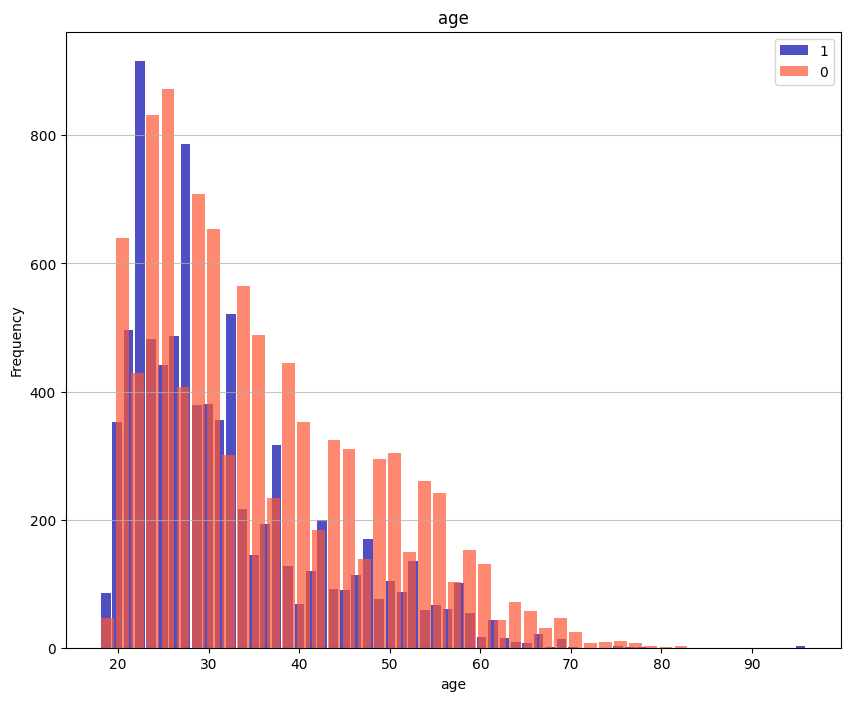

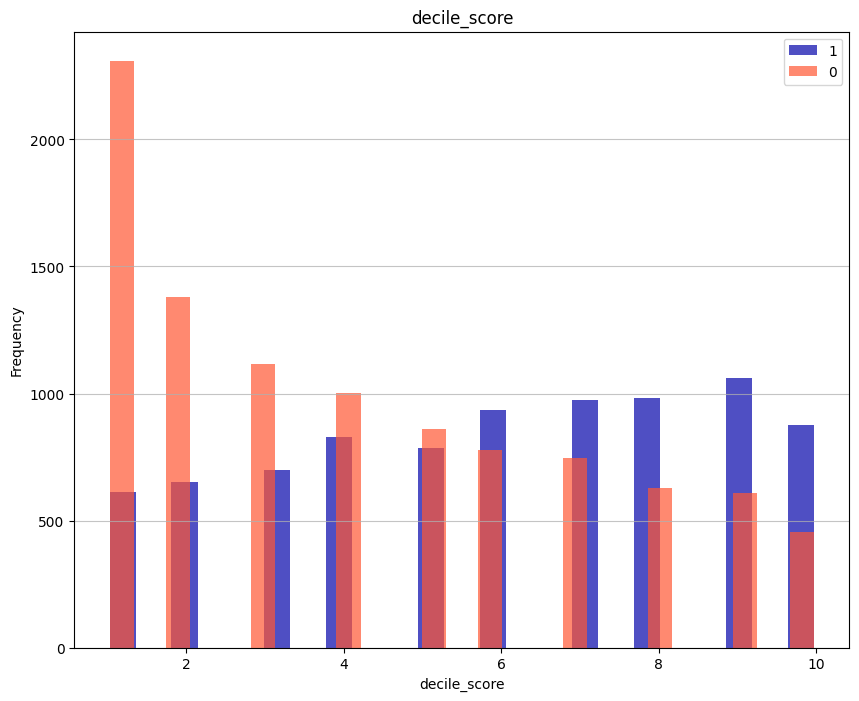

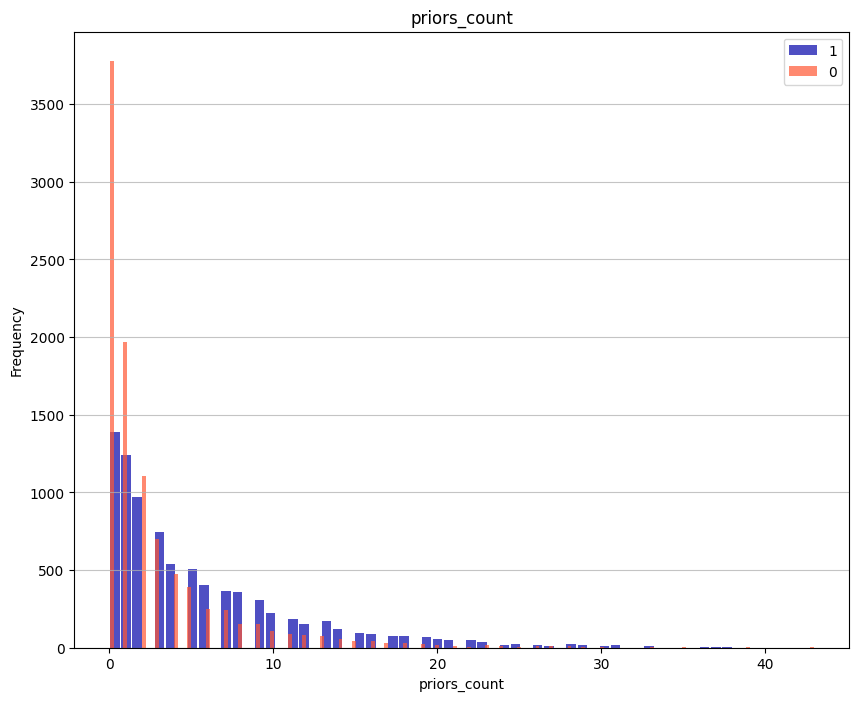

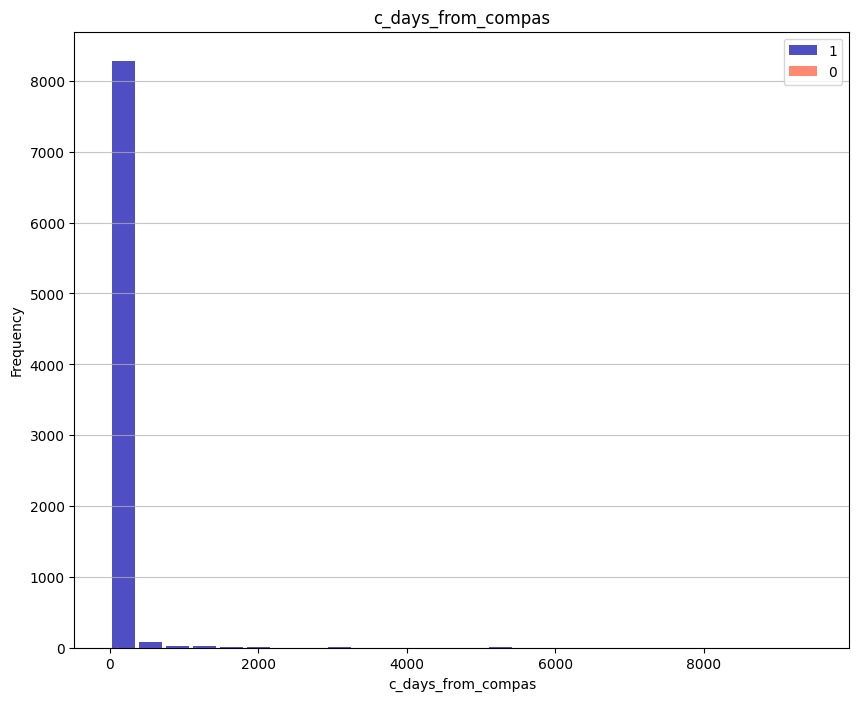

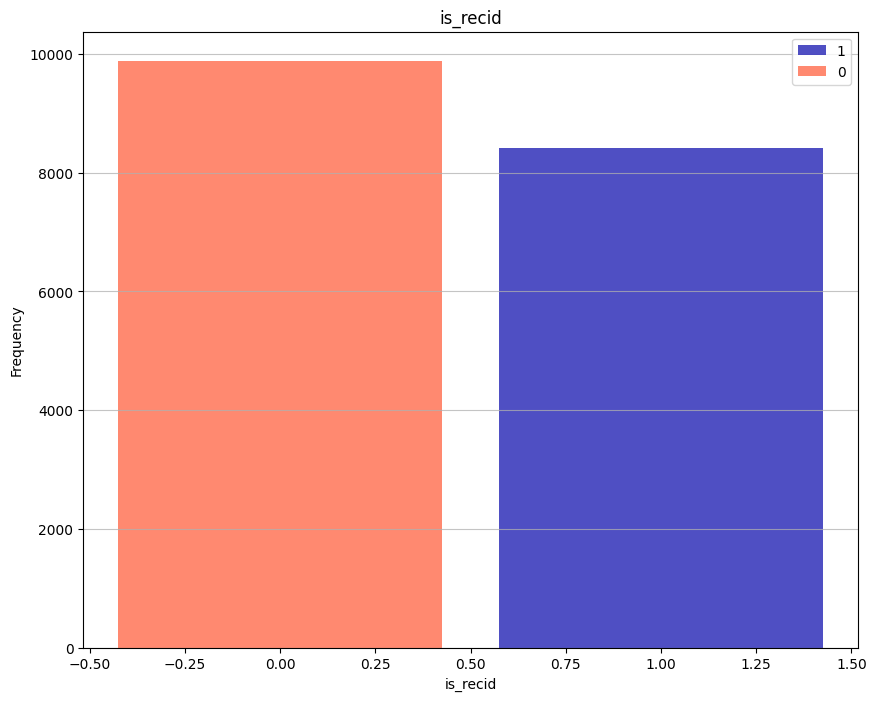

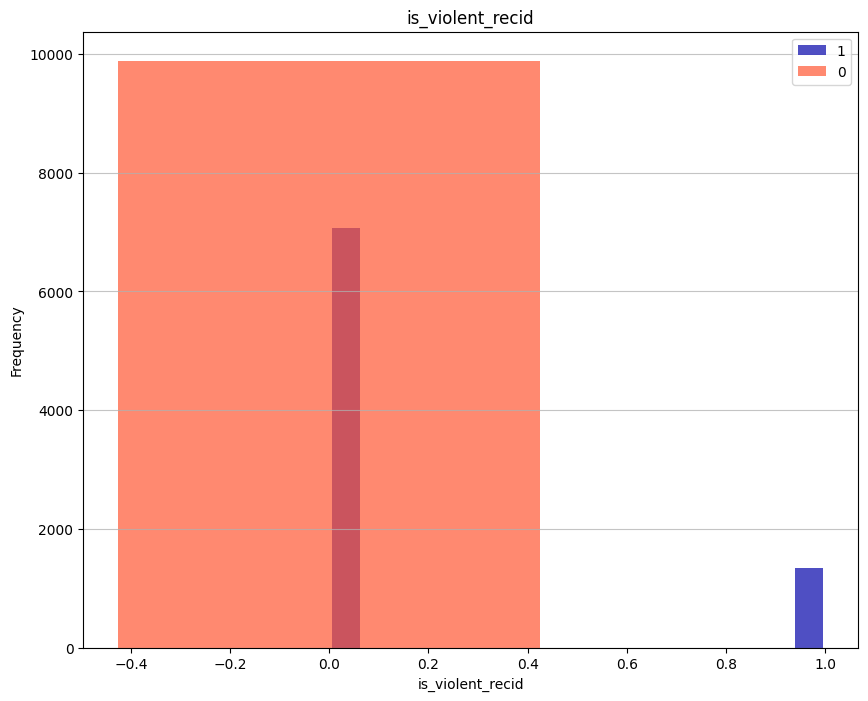

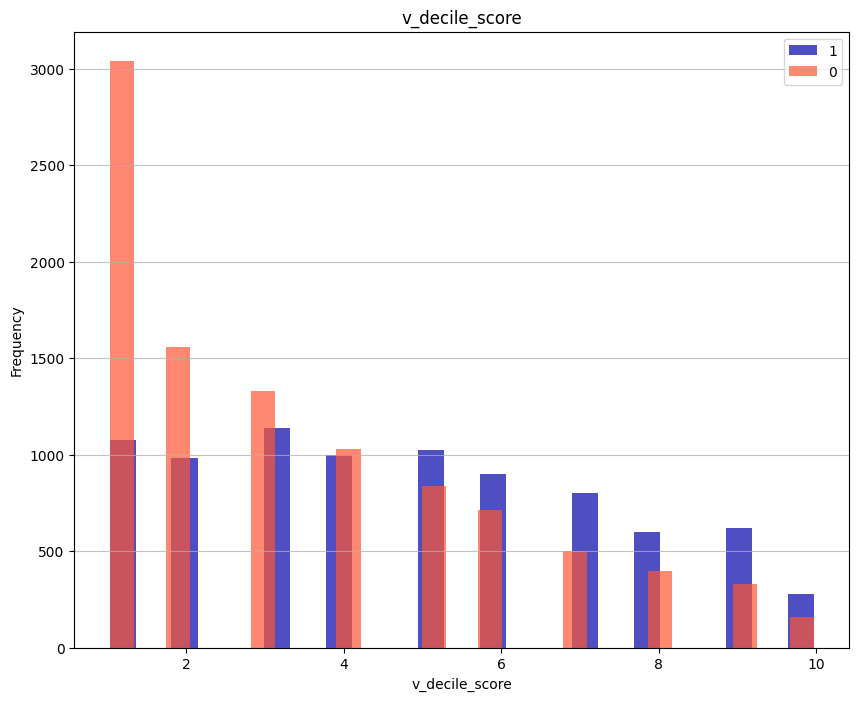

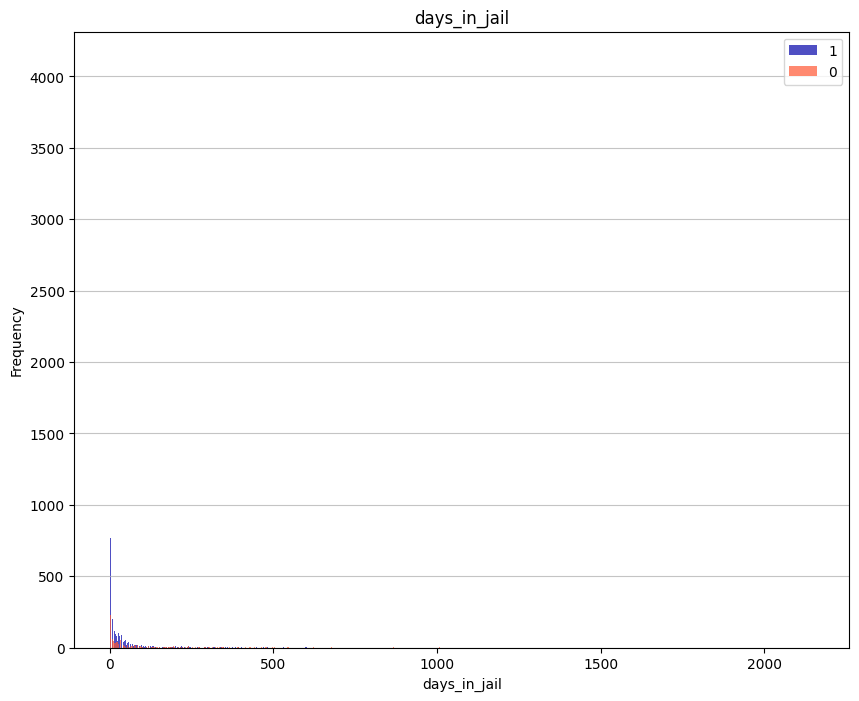

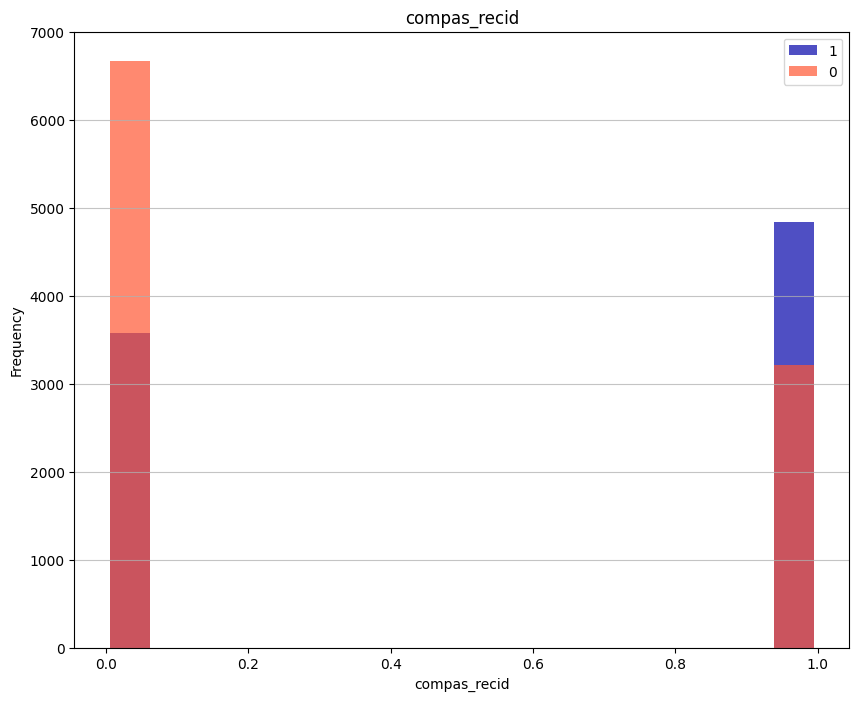

In [147]:
compas_eda.histogram(divide_by_score=True)

In [ ]:
compas_eda.boxplot(divide_by_score=True)

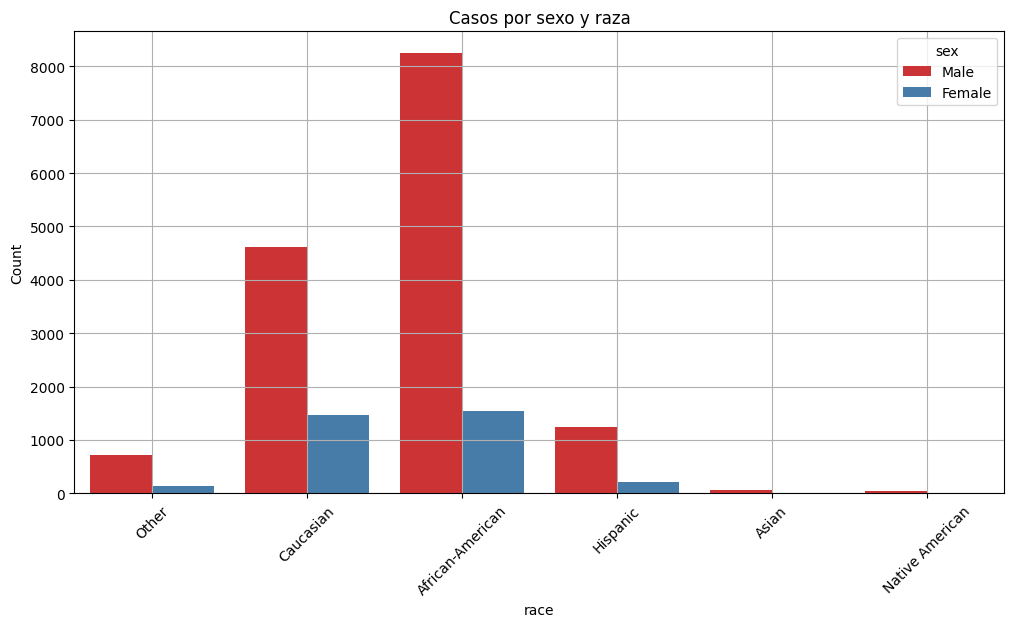

In [148]:
compas_eda.countplot(x = 'race', hue = 'sex' , title = "Casos por sexo y raza")

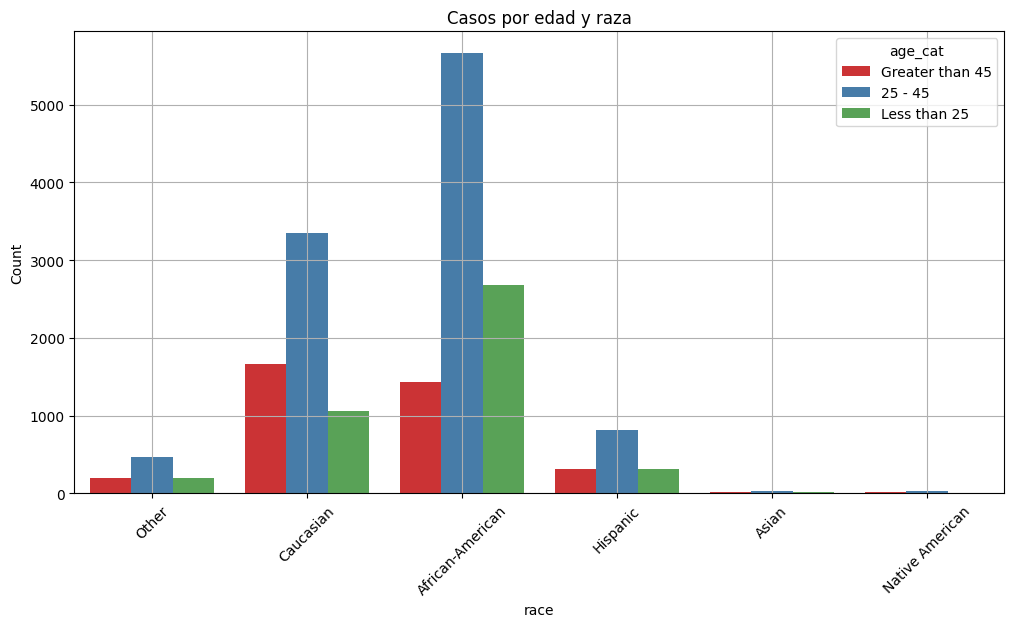

In [149]:
compas_eda.countplot(x = 'race', hue = 'age_cat' , title ="Casos por edad y raza")

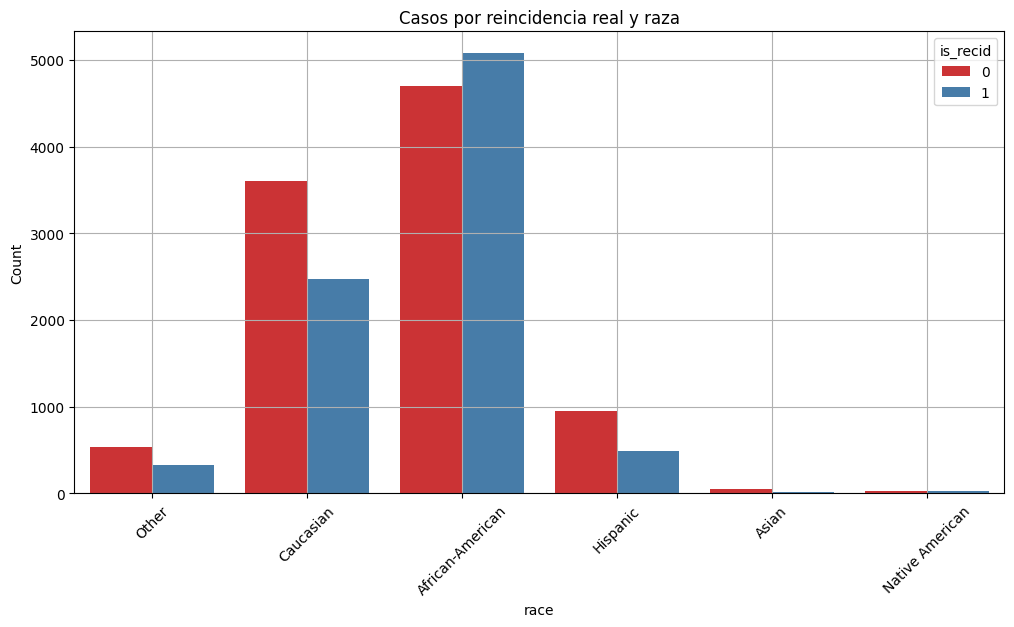

In [150]:
compas_eda.countplot(x = 'race', hue = 'is_recid' , title = "Casos por reincidencia real y raza")

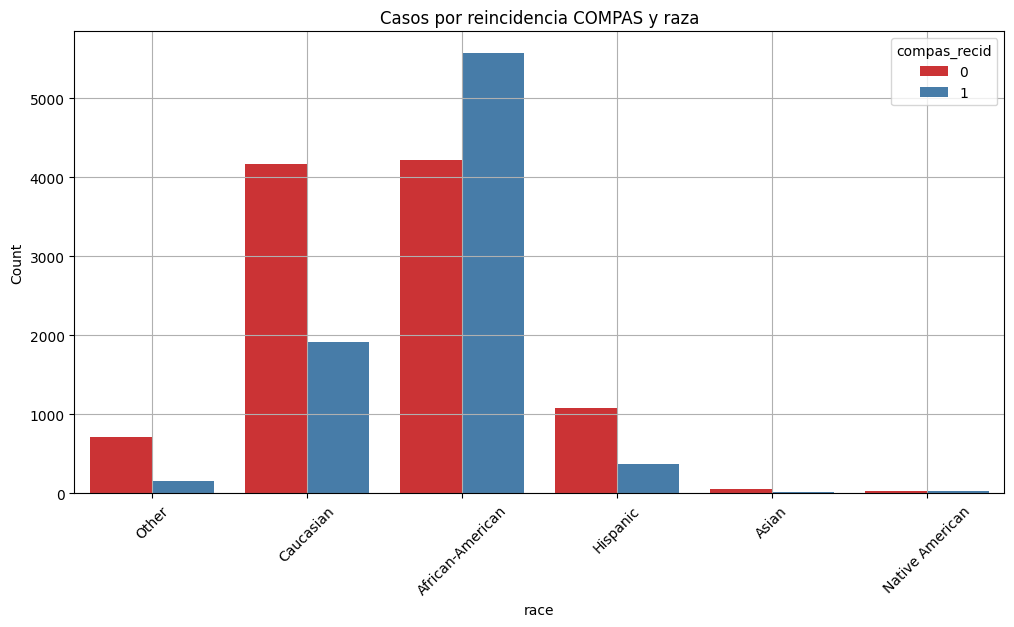

In [151]:
compas_eda.countplot(x = 'race', hue = 'compas_recid' , title = "Casos por reincidencia COMPAS y raza")


**En estas dos últimas gráficas se observa un pequeño sesgo de COMPAS respecto del ground truth de clasificar a los afro-americanos como reincidentes. Mientras que para, por ejemplo, los caucásicos es a la inversa**